In [1]:
from city_val import setup
labels = [0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 18, 19, 20, 22, 24, 25]

res_data, test_data = setup()

/opt/homebrew/Caskroom/miniconda/base/envs/bzzt/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from tqdm import tqdm
import numpy as np

tp = {}
fp = {}
tn = {}
fn = {}
for key in labels:
    tp[key], fp[key], tn[key], fn[key] = 0, 0, 0, 0

for i in tqdm(range(len(res_data))):
    _, pred_mask = res_data[i]
    _, act_mask = test_data[i]

    pred_mask = np.asarray(pred_mask)
    pred_mask = pred_mask.flatten()

    act_mask = np.asarray(act_mask)
    act_mask = act_mask.flatten()

    for key in labels:
        tp[key] += sum((act_mask[pred_mask == key] == key) == True)
        tn[key] += sum((pred_mask[act_mask != key] != key) == True)
        fp[key] += sum((act_mask[pred_mask == key] != key) == True)
        fn[key] += sum((pred_mask[act_mask == key] != key) == True)


100%|██████████| 500/500 [03:03<00:00,  2.73it/s]


In [4]:
iou = {}
pixel_accuracy = {}
dice_coeff = {}
precision = {}
recall = {}
f1_score = {}

for key in labels:
    # IoU
    iou_val = (tp[key]) / (tp[key] + fp[key] + fn[key])
    iou[key] = iou_val

    # Pixel Accuracy
    pix_val = (tp[key]) / (tp[key] + fp[key] + fn[key])
    pixel_accuracy[key] = pix_val

    # Dice Coefficient
    dice_val = (2*tp[key]) / (2*tp[key] + fp[key] + fn[key])
    dice_coeff[key] = dice_val

    # Precision
    if tp[key] + fp[key] == 0:
        precision[key] = 0
    else:
        precision[key] = tp[key] / (tp[key] + fp[key])

    # Recall
    if tp[key] + fn[key] == 0:
        recall[key] = 0
    else:
        recall[key] = tp[key] / (tp[key] + fn[key])

    # F1 Score
    if precision[key] + recall[key] == 0:
        f1_score[key] = 0
    else:
        f1_score[key] = 2 * (precision[key] * recall[key]) / (precision[key] + recall[key])


In [6]:
from dataset_class import label_map

print("Class-wise Evaluation Metrics:")
print("--------------------------------")

for key in labels:
    print(f"Class: {label_map[key]}")
    print(f"IoU: {iou[key]:.1f}")
    print(f"Pixel Accuracy: {pixel_accuracy[key]:.2f}")
    print(f"Dice Coefficient: {dice_coeff[key]:.2f}")
    print(f"Precision: {precision[key]:.2f}")
    print(f"Recall: {recall[key]:.2f}")
    print(f"F1 Score: {f1_score[key]:.2f}")
    print("---------")


Class-wise Evaluation Metrics:
--------------------------------
Class: Road
IoU: 0.4
Pixel Accuracy: 0.41
Dice Coefficient: 0.58
Precision: 1.00
Recall: 0.41
F1 Score: 0.58
---------
Class: Sidewalk
IoU: 0.0
Pixel Accuracy: 0.00
Dice Coefficient: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
---------
Class: Person
IoU: 0.0
Pixel Accuracy: 0.00
Dice Coefficient: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
---------
Class: Rider
IoU: 0.0
Pixel Accuracy: 0.00
Dice Coefficient: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
---------
Class: Motorcycle
IoU: 0.0
Pixel Accuracy: 0.00
Dice Coefficient: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
---------
Class: Bicycle
IoU: 0.0
Pixel Accuracy: 0.00
Dice Coefficient: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
---------
Class: Car
IoU: 0.2
Pixel Accuracy: 0.20
Dice Coefficient: 0.33
Precision: 0.21
Recall: 0.76
F1 Score: 0.33
---------
Class: Truck
IoU: 0.1
Pixel Accuracy: 0.09
Dice Coefficient: 0.17
Precision: 0.13
Recall

100%|██████████| 500/500 [00:15<00:00, 32.89it/s]


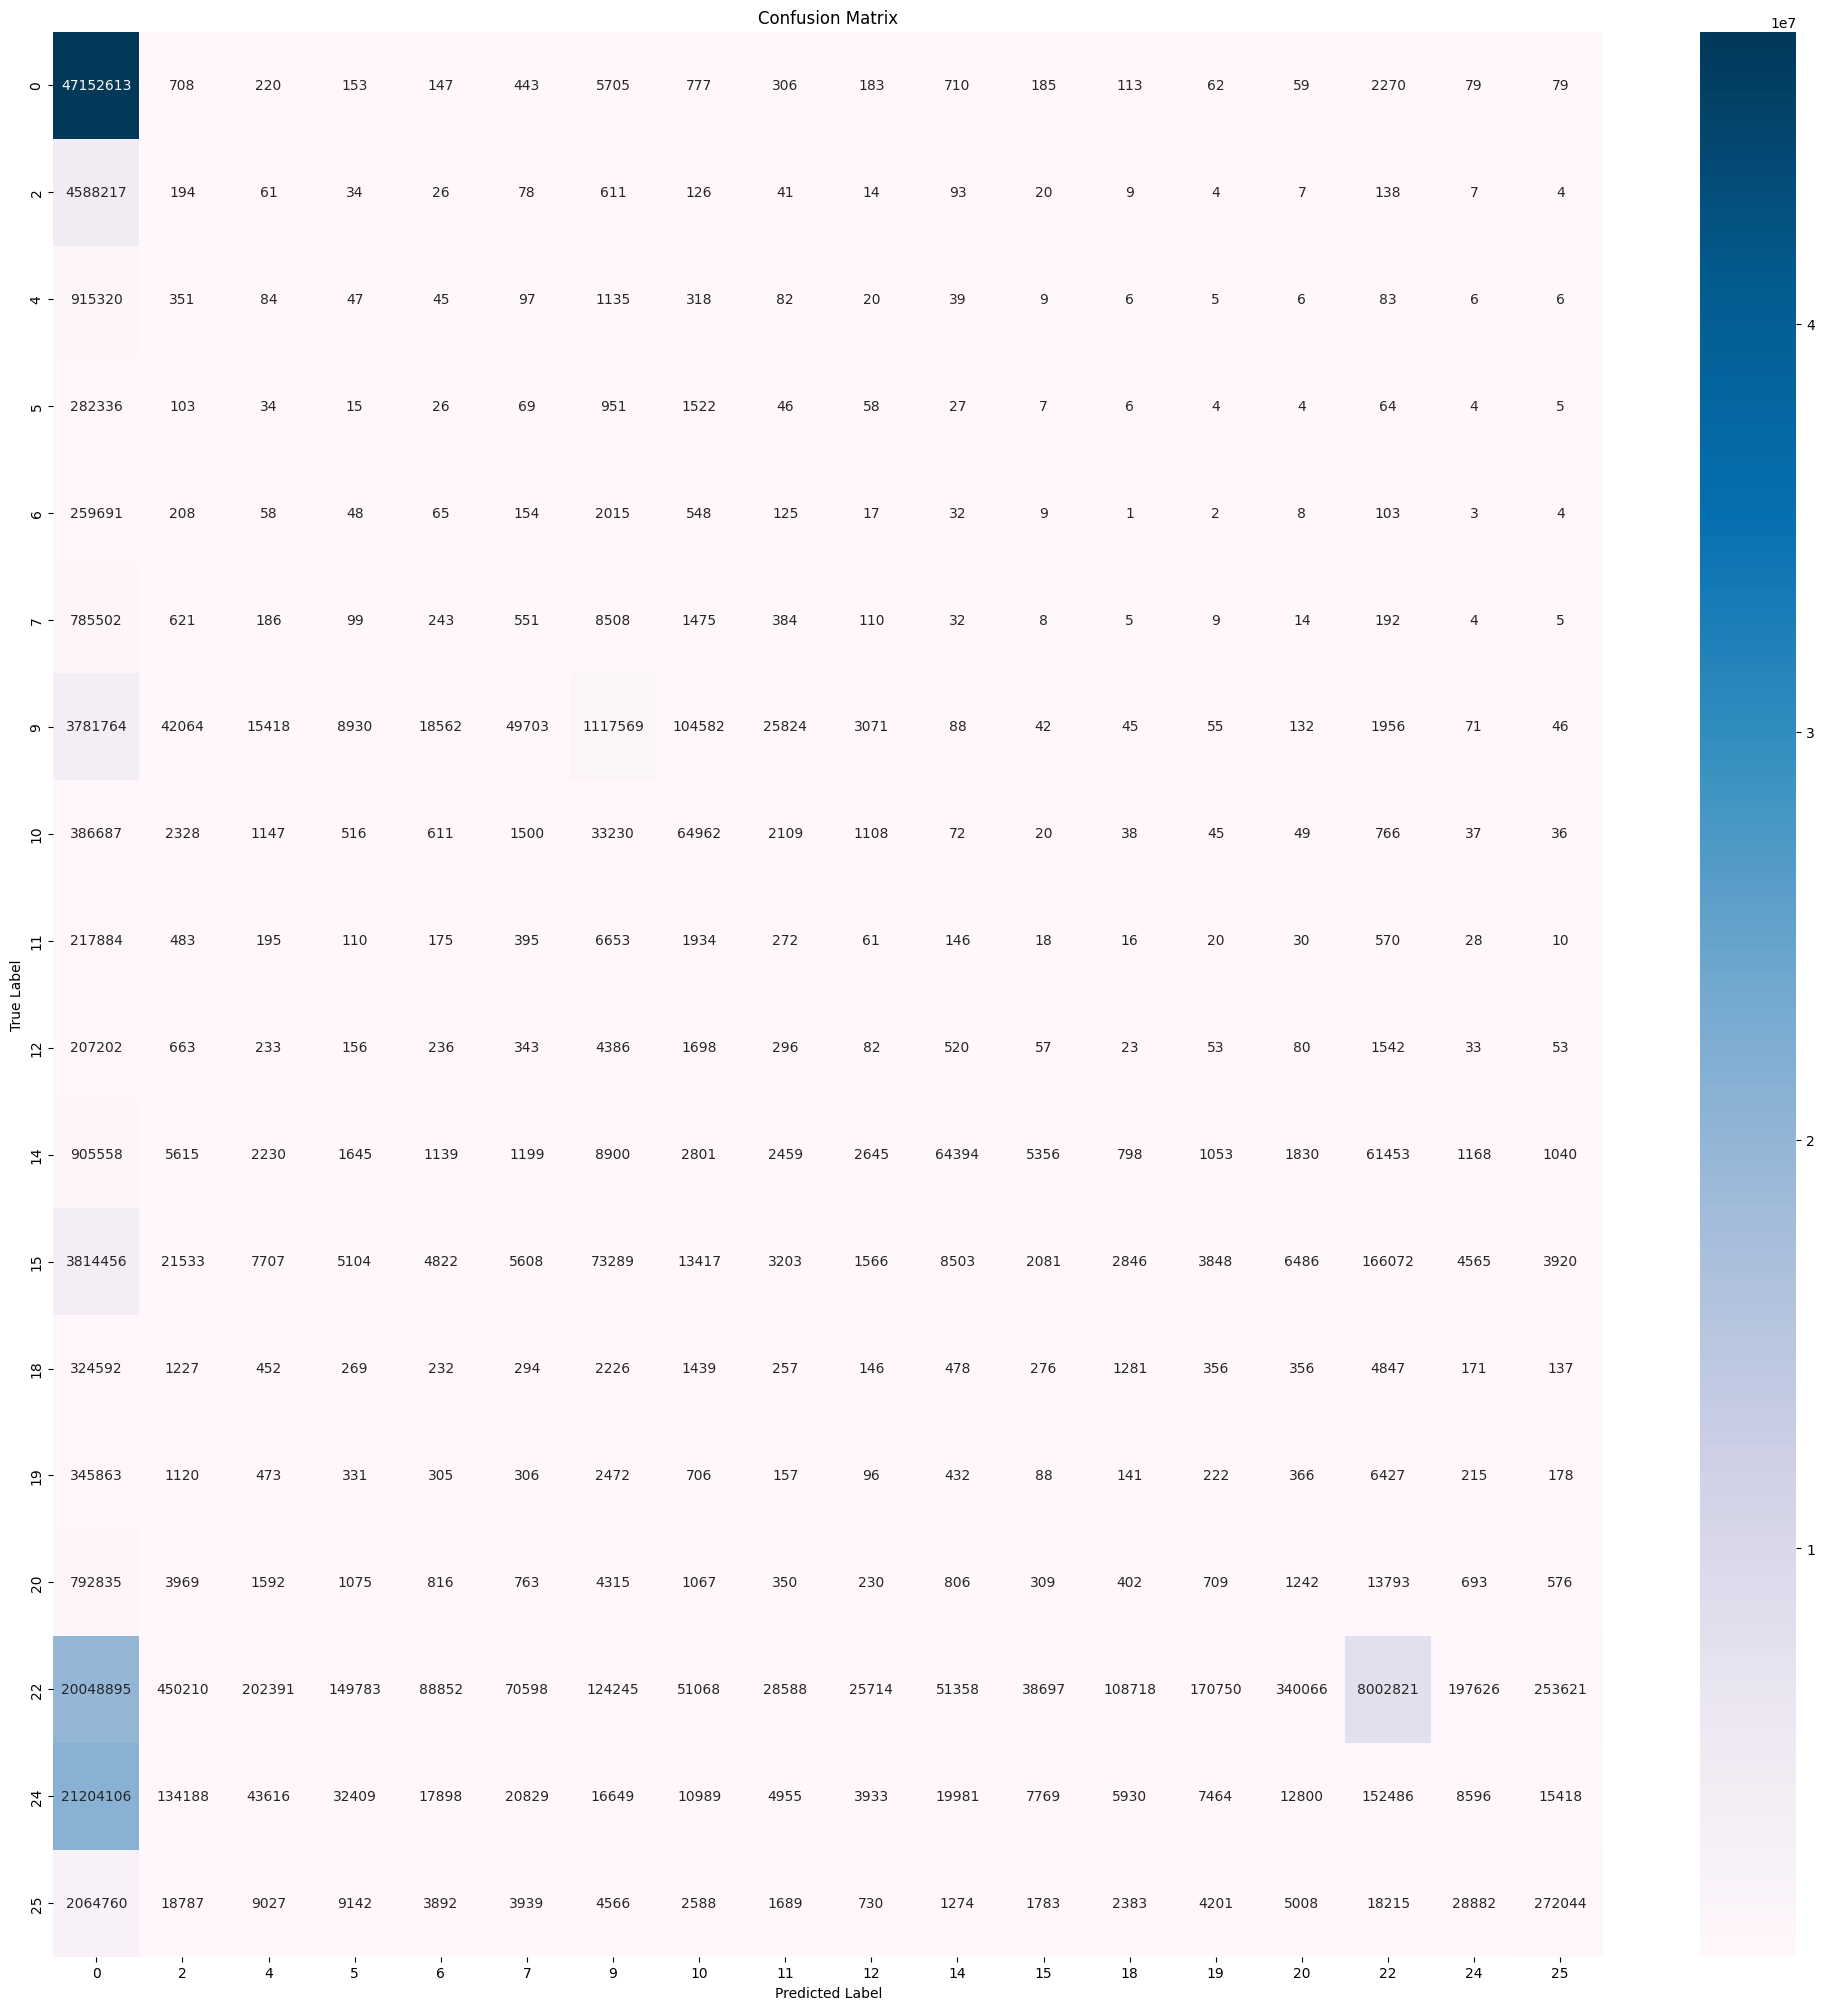

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


confusion_matrix = {key: {k: 0 for k in labels} for key in labels}
lbl_st = set(labels)
for i in tqdm(range(len(res_data))):
    _, pred_mask = res_data[i]
    _, act_mask = test_data[i]

    pred_mask = np.asarray(pred_mask).flatten()
    act_mask = np.asarray(act_mask).flatten()

    for key in labels:
        misclassified_samples = act_mask[pred_mask == key]
        r1 = set(misclassified_samples) 
        for misclass in (set(misclassified_samples)):
            if(misclass in lbl_st):
                confusion_matrix[key][misclass] += np.sum(misclassified_samples == misclass)

confusion_matrix_array = np.array([[confusion_matrix[key][k] for k in labels] for key in labels])

plt.figure(figsize=(25, 25))
sns.heatmap(confusion_matrix_array, annot=True, cmap='PuBu', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()